In [1]:
%%writefile generate_data.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(0, 10, 200)
a = np.random.random(200) + xs
b = np.random.random(200) + xs*2
y = 2 * a + 3 * b + np.random.random(200) * 4
df1 = pd.DataFrame({'a': a, 'b': b, 'y': y})
plt.scatter(xs, a)
plt.scatter(xs, b)
plt.scatter(xs, y)
plt.show()
df1.to_csv('df1.csv', index=False)

xs = np.linspace(5, 20, 200)
a = np.random.random(200) + xs
b = np.random.random(200) + xs*2
y = 2 * a + 3 * b + np.random.random(200) * 4
df2 = pd.DataFrame({'a': a, 'b': b, 'y': y})
plt.scatter(xs, a)
plt.scatter(xs, b)
plt.scatter(xs, y)
plt.show()
df2.to_csv('df2.csv', index=False)

xs = np.linspace(10, 15, 200)
a = np.random.random(200) + xs
b = np.random.random(200) + xs*2
y = 2 * a + 3 * b + np.random.random(200) * 4
df3 = pd.DataFrame({'a': a, 'b': b, 'y': y})
plt.scatter(xs, a)
plt.scatter(xs, b)
plt.scatter(xs, y)
plt.show()
df3.to_csv('df3.csv', index=False)

xs = np.linspace(0, 10, 200)
a = np.random.random(200) + xs
b = np.random.random(200) + xs*2
y = 2 * a + 3 * b + np.random.random(200) * 4
y[20:60] *= 3
df_with_noise = pd.DataFrame({'a': a, 'b': b, 'y': y})
plt.scatter(xs, a)
plt.scatter(xs, b)
plt.scatter(xs, y)
plt.show()
df_with_noise.to_csv('df_with_noise.csv', index=False)

Writing generate_data.py


In [2]:
%%writefile create_model.py

import pickle
import pandas as pd
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df1[['a', 'b']], df1['y'])

pickle.dump(model, open('model.pckl', 'wb'))

Writing create_model.py


In [3]:
%%writefile test_model.py

from sklearn.metrics import r2_score
import pickle
import pandas as pd

def model_test(df, model_path='model.pckl'):
    model = pickle.load(open(model_path, 'rb'))
    data = pd.read_csv(df)
    predicted = model.predict(data[['a', 'b']])
    return r2_score(data['y'], predicted)


def test_model_1():
    assert model_test('df1.csv') > 0.8

def test_model_2():
    assert model_test('df2.csv') > 0.8

def test_model_3():
    assert model_test('df3.csv') > 0.8
    
def test_model_4():
    assert model_test('df_with_noise.csv') > 0.8

Writing test_model.py


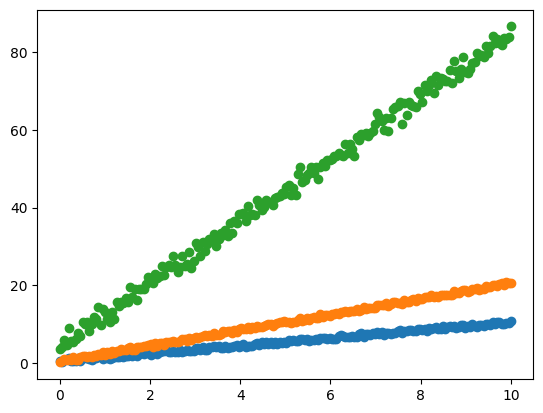

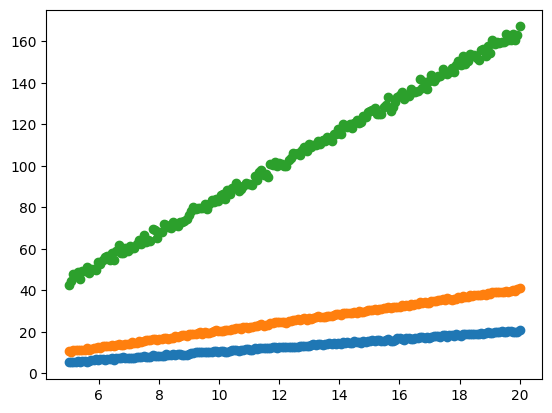

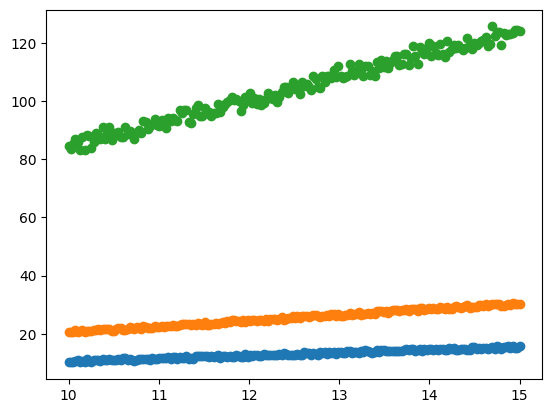

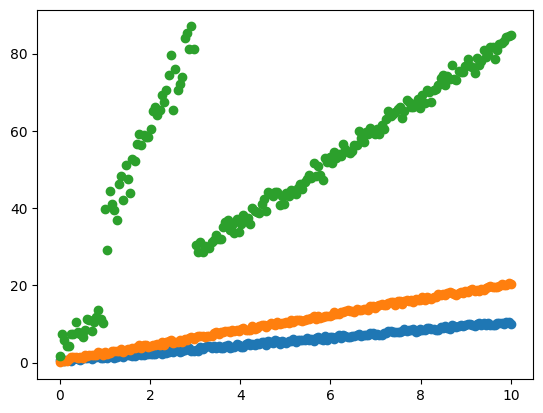

/usr/local/lib/python3.10/dist-packages/pytest_asyncio/plugin.py:173: DeprecationWarning: You're using an outdated version of pytest. Newer releases of pytest-asyncio will not be compatible with this pytest version. Please update pytest to version 7 or later.
  warnings.warn(
============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-6.2.5, py-1.11.0, pluggy-1.0.0
rootdir: /home/sava/Downloads
plugins: asyncio-0.20.3, anyio-3.6.2
asyncio: mode=strict
collected 4 items                                                              

test_model.py ...F                                                       [100%]

=================================== FAILURES ===================================
_________________________________ test_model_4 _________________________________

    def test_model_4():
>       assert model_test('df_with_noise.csv') > 0.8
E       AssertionError: assert 0.2225912018274917 > 0.8
E        +  where 0.22259

In [4]:
%run -i "generate_data.py"
%run -i "create_model.py"
!pytest